<a href="https://colab.research.google.com/github/RamyaP99/Handwritten-Digits-Classification/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [ ]:
df = pd.read_csv("digit_svm.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Ploting some samples

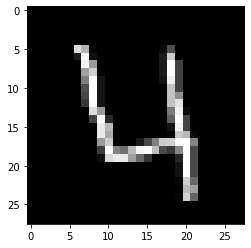

In [ ]:
four = df.iloc[3,1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four,cmap="gray")

Visualizing the number of counts of digits

In [ ]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

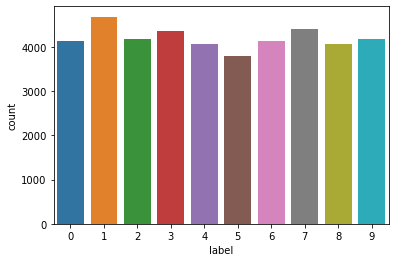

In [ ]:
sns.countplot(x="label",data=df)
plt.show()

In [ ]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### Separating the data into input and output

In [ ]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

### Training and Testing the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


### Lets build two models - Linear and Non linear  

## Linear Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
linear_clf = SVC(kernel="linear",random_state=0)

In [ ]:
linear_clf.fit(x_train , y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
pred_y = linear_clf.predict(x_test)

In [ ]:
pred_y

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test,pred_y)

array([[778,   0,   7,   4,   3,   6,  11,   0,   3,   1],
       [  0, 947,   4,   1,   0,   1,   1,   2,   5,   0],
       [ 10,   9, 780,  16,  11,   7,   6,   8,  12,   1],
       [  2,   3,  25, 779,   1,  24,   0,   5,  19,   5],
       [  3,   5,   8,   1, 778,   3,   5,   3,   3,  18],
       [  7,   7,   7,  38,   5, 662,   8,   2,  16,   4],
       [  6,   0,  15,   0,  13,  11, 795,   0,   1,   0],
       [  4,   5,  11,   7,  12,   0,   1, 831,   6,  22],
       [  5,  14,  11,  29,   5,  24,   6,   1, 666,   7],
       [ 11,   4,   6,   8,  33,   8,   0,  28,   7, 707]], dtype=int64)

In [ ]:
accuracy_score(y_test,pred_y)

0.919404761904762

Linear model gives approx. 92% accuracy

## Non Linear Model

In [ ]:
rbf_clf = SVC(kernel="rbf",random_state=0)

In [ ]:
rbf_clf.fit(x_train , y_train)

SVC(random_state=0)

In [ ]:
pred_y1 = rbf_clf.predict(x_test)

In [ ]:
pred_y1

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [ ]:
confusion_matrix(y_test,pred_y1)

array([[792,   0,   5,   0,   2,   2,   7,   1,   4,   0],
       [  0, 941,  10,   2,   1,   0,   2,   2,   2,   1],
       [  4,   2, 834,   6,   3,   0,   2,   6,   3,   0],
       [  0,   3,  14, 810,   2,  11,   2,   8,  11,   2],
       [  1,   4,  11,   0, 788,   2,   4,   1,   2,  14],
       [  3,   1,   3,   8,   1, 728,   7,   0,   3,   2],
       [  2,   0,  14,   0,   1,   6, 816,   0,   2,   0],
       [  0,   4,  22,   1,   7,   0,   0, 853,   3,   9],
       [  2,   5,   6,   7,   3,  12,   7,   1, 723,   2],
       [  3,   2,   8,   7,   8,   2,   0,  18,   4, 760]], dtype=int64)

In [ ]:
accuracy_score(y_test,pred_y1)

0.9577380952380953

Non linear model gives approx. 96% accuracy

The accuracy achieved using non linear kernel(rbf) is much higher than that of a linear kernel